In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
opoid = pd.read_csv("/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv")

In [2]:
opoid.head()

,Entity,Code,Year,Death rate from opioid use disorders among both sexes aged 0-4 year olds,Death rate from opioid use disorders among both sexes aged 5-14 year olds,Death rate from opioid use disorders among both sexes aged 15-49 year olds,Death rate from opioid use disorders among both sexes aged 50-69 year olds,Death rate from opioid use disorders among both sexes aged 70+ year olds,Death rate from opioid use disorders among both sexes
0,Afghanistan,AFG,2000,0,0.0,1.394235,2.071333,2.119804,0.76
1,Afghanistan,AFG,2001,0,0.0,1.427583,2.149325,2.186048,0.77
2,Afghanistan,AFG,2002,0,0.0,1.435476,2.187695,2.238797,0.78
3,Afghanistan,AFG,2003,0,0.0,1.469747,2.194162,2.277711,0.79
4,Afghanistan,AFG,2004,0,0.0,1.493575,2.214003,2.324937,0.81


In [3]:
opoid.describe()

,Year,Death rate from opioid use disorders among both sexes aged 0-4 year olds,Death rate from opioid use disorders among both sexes aged 5-14 year olds,Death rate from opioid use disorders among both sexes aged 15-49 year olds,Death rate from opioid use disorders among both sexes aged 50-69 year olds,Death rate from opioid use disorders among both sexes aged 70+ year olds,Death rate from opioid use disorders among both sexes
count,4422.000000,4422.0,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,2010.500000,0.0,0.003716,1.039404,0.664043,0.878263,0.682277
std,6.345006,0.0,0.030613,2.203486,1.468327,1.075167,1.390479
min,2000.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.0,0.000000,0.082362,0.050730,0.140016,0.070000
50%,2010.500000,0.0,0.000000,0.298366,0.173080,0.430540,0.230000
75%,2016.000000,0.0,0.000000,1.017641,0.745841,1.435782,0.650000
max,2021.000000,0.0,1.420608,36.440357,30.451992,12.794323,24.730000


In [4]:
opoid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 9 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Entity                                                                      4422 non-null   object 
 1   Code                                                                        4290 non-null   object 
 2   Year                                                                        4422 non-null   int64  
 3   Death rate from opioid use disorders among both sexes aged 0-4 year olds    4422 non-null   int64  
 4   Death rate from opioid use disorders among both sexes aged 5-14 year olds   4422 non-null   float64
 5   Death rate from opioid use disorders among both sexes aged 15-49 year olds  4422 non-null   float64
 6   Death rate from opioid use disorders among both s

In [9]:
import pandas as pd
import matplotlib.plotly as plotly
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# Filter for USA
df_usa = df[df['Entity'] == 'United States']

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
]

# Create figure for USA
fig_usa = go.Figure()

for age_group in age_groups:
    fig_usa.add_trace(go.Scatter(
        x=df_usa['Year'],
        y=df_usa[age_group],
        mode='lines',
        name=age_group,
        hoverinfo='x+y+name'
    ))

# Customize layout
fig_usa.update_layout(
    title="Opioid Use Disorder Death Rates in USA (2000-2021)",
    xaxis_title="Year",
    yaxis_title="Death Rate",
    template="plotly_white",
    width=1000,  # Larger width
    height=600,  # Larger height
    legend=dict(orientation="h", y=-0.3)  # Move legend below X-axis
)

# Show figure
fig_usa.show()


ModuleNotFoundError: No module named 'matplotlib.plotly'

In [7]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# Filter for Canada
df_canada = df[df['Entity'] == 'Canada']

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
]

# Create figure for Canada
fig_canada = go.Figure()

for age_group in age_groups:
    fig_canada.add_trace(go.Scatter(
        x=df_canada['Year'],
        y=df_canada[age_group],
        mode='lines',
        name=age_group,
        hoverinfo='x+y+name'
    ))

# Customize layout
fig_canada.update_layout(
    title="Opioid Use Disorder Death Rates in Canada (2000-2021)",
    xaxis_title="Year",
    yaxis_title="Death Rate",
    template="plotly_white",
    width=1000,  # Larger width
    height=600,  # Larger height
    legend=dict(orientation="h", y=-0.3)  # Move legend below X-axis
)

# Show figure
fig_canada.show()


In [10]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# Filter for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
]

# Create figure for comparison
fig = go.Figure()

# Add traces for USA
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_usa['Year'],
        y=df_usa[age_group],
        mode='lines',
        name=f"USA - {age_group}",
        hoverinfo='x+y+name'
    ))

# Add traces for Canada
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_canada['Year'],
        y=df_canada[age_group],
        mode='lines',
        name=f"Canada - {age_group}",
        hoverinfo='x+y+name',
        line=dict(dash='dash')  # Dashed lines for Canada for better differentiation
    ))

# Customize layout
fig.update_layout(
    title="Comparative Opioid Use Disorder Death Rates: USA vs Canada (2000-2021)",
    xaxis_title="Year",
    yaxis_title="Death Rate",
    template="plotly_white",
    width=1000,  # Larger width
    height=600,  # Larger height
    legend=dict(orientation="h", y=-0.3),  # Move legend below X-axis
    hovermode="x unified"  # Show all hover info at the same x-point
)

# Show figure
fig.show()


In [11]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# Filter for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
]

# Create figure for comparison
fig = go.Figure()

# Add traces for USA
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_usa['Year'],
        y=df_usa[age_group],
        mode='lines',
        name=f"USA - {age_group}",
        hoverinfo='x+y+name'
    ))

# Add traces for Canada
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_canada['Year'],
        y=df_canada[age_group],
        mode='lines',
        name=f"Canada - {age_group}",
        hoverinfo='x+y+name',
        line=dict(dash='dash')  # Dashed lines for Canada for better differentiation
    ))

# Customize layout
fig.update_layout(
    title="Comparative Opioid Use Disorder Death Rates: USA vs Canada (2000-2021)",
    xaxis_title="Year",
    yaxis_title="Death Rate",
    template="plotly_white",
    width=1000,  # Larger width
    height=600,  # Larger height
    legend=dict(orientation="h", y=-0.3),  # Move legend below X-axis
    hovermode="x unified"  # Show all hover info at the same x-point
)

# Show figure
fig.show()


In [12]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# Filter for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
]

# Create figure for comparison
fig = go.Figure()

# Add traces for USA
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_usa['Year'],
        y=df_usa[age_group],
        mode='lines',
        name=f"USA - {age_group}",
        hoverinfo='x+y+name'
    ))

# Add traces for Canada
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_canada['Year'],
        y=df_canada[age_group],
        mode='lines',
        name=f"Canada - {age_group}",
        hoverinfo='x+y+name',
        line=dict(dash='dash')  # Dashed lines for Canada for better differentiation
    ))

# Customize layout
fig.update_layout(
    title="Comparative Opioid Use Disorder Death Rates: USA vs Canada (2000-2021)",
    xaxis_title="Year",
    yaxis_title="Death Rate",
    template="plotly_white",
    width=1000,  # Larger width
    height=600,  # Larger height
    legend=dict(orientation="h", y=-0.3),  # Move legend below X-axis
    hovermode="x unified"  # Show all hover info at the same x-point
)

# Show figure
fig.show()


In [13]:
import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# Filter for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes'
]

# Create figure for comparison
fig = go.Figure()

# Add traces for USA
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_usa['Year'],
        y=df_usa[age_group],
        mode='lines',
        name=f"USA - {age_group}",
        hoverinfo='x+y+name'
    ))

# Add traces for Canada
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=df_canada['Year'],
        y=df_canada[age_group],
        mode='lines',
        name=f"Canada - {age_group}",
        hoverinfo='x+y+name',
        line=dict(dash='dash')  # Dashed lines for Canada for better differentiation
    ))

# Customize layout
fig.update_layout(
    title="Comparative Opioid Use Disorder Death Rates Among Both Sexes: USA vs Canada (2000-2021)",
    xaxis_title="Year",
    yaxis_title="Death Rate",
    template="plotly_white",
    width=1000,  # Larger width
    height=600,  # Larger height
    legend=dict(orientation="h", y=-0.3),  # Move legend below X-axis
    hovermode="x unified"  # Show all hover info at the same x-point
)

# Show figure
fig.show()

# Save the figure as an HTML file
fig.write_html("opioid_death_rates_comparison_among_both_sexes.html")

print("Chart saved as 'opioid_death_rates_comparison_among_both_sexes.html'")


Chart saved as 'opioid_death_rates_comparison_among_both_sexes.html'


<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

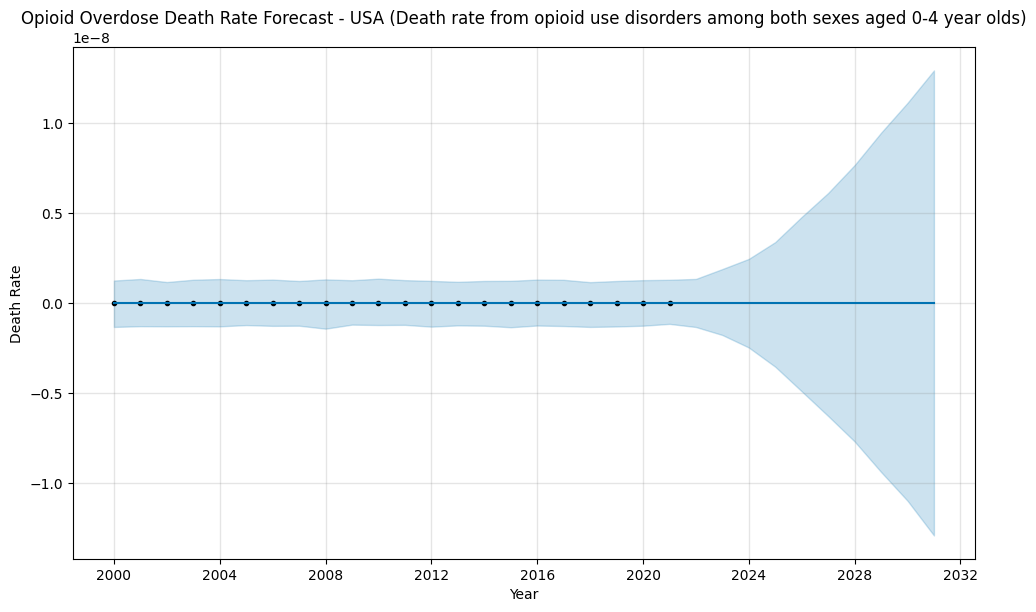

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

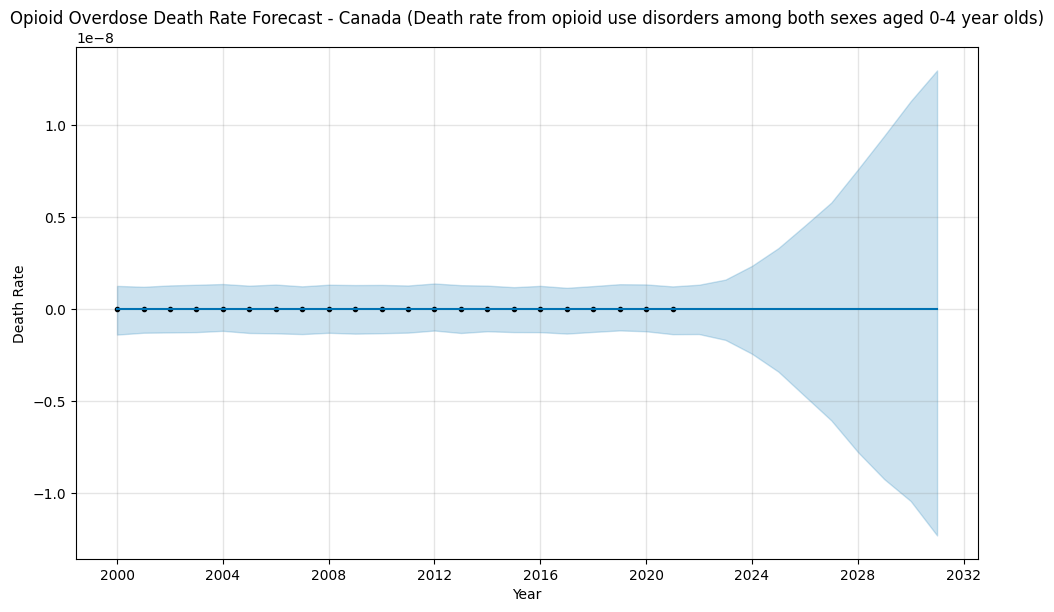

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:01 - cmdstanpy - INFO - Chain [1] start processing
17:34:01 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

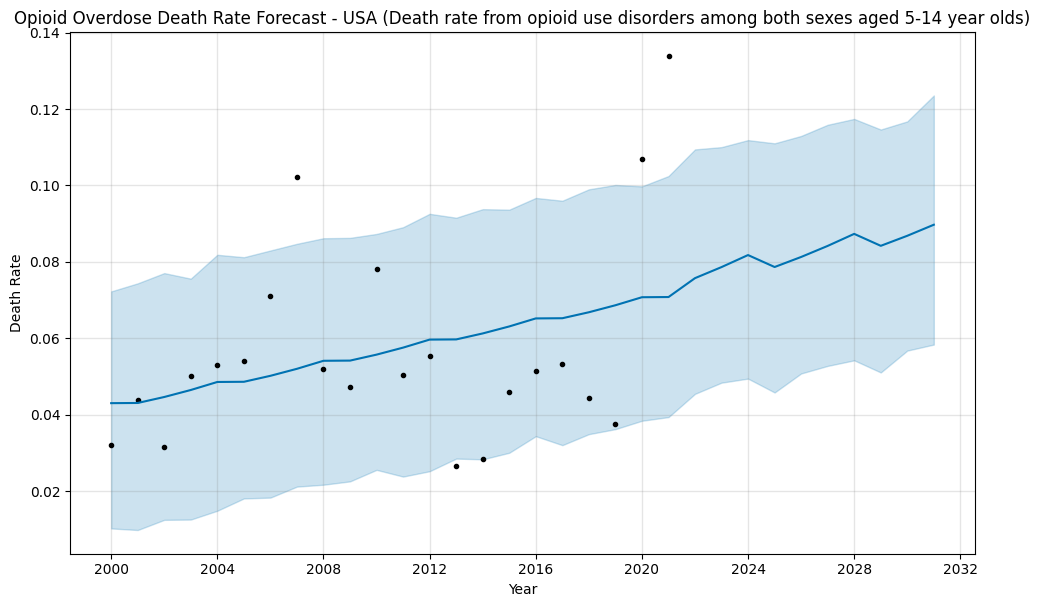

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:01 - cmdstanpy - INFO - Chain [1] start processing
17:34:01 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

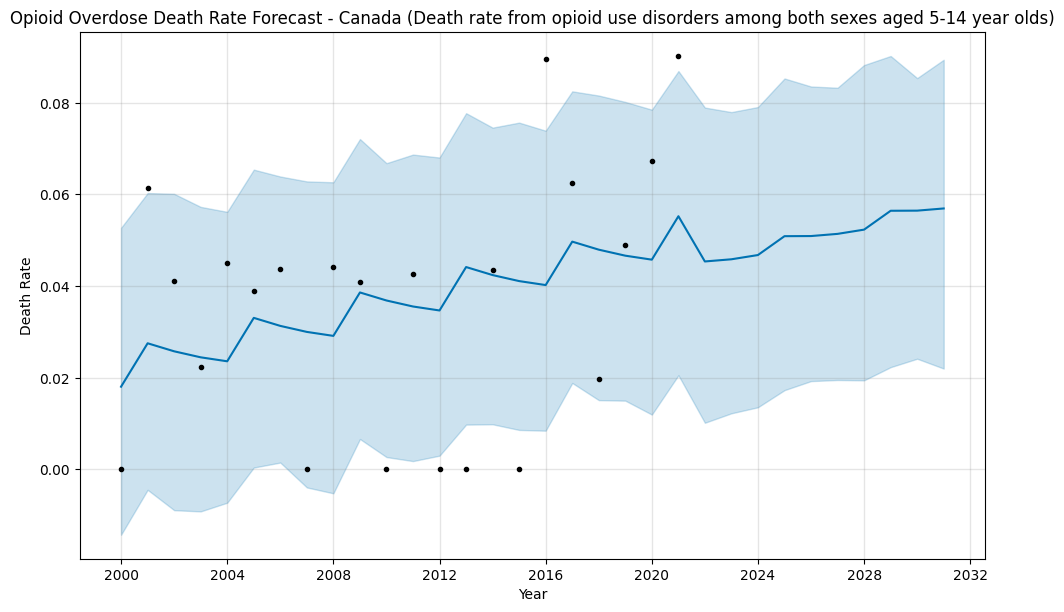

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:02 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

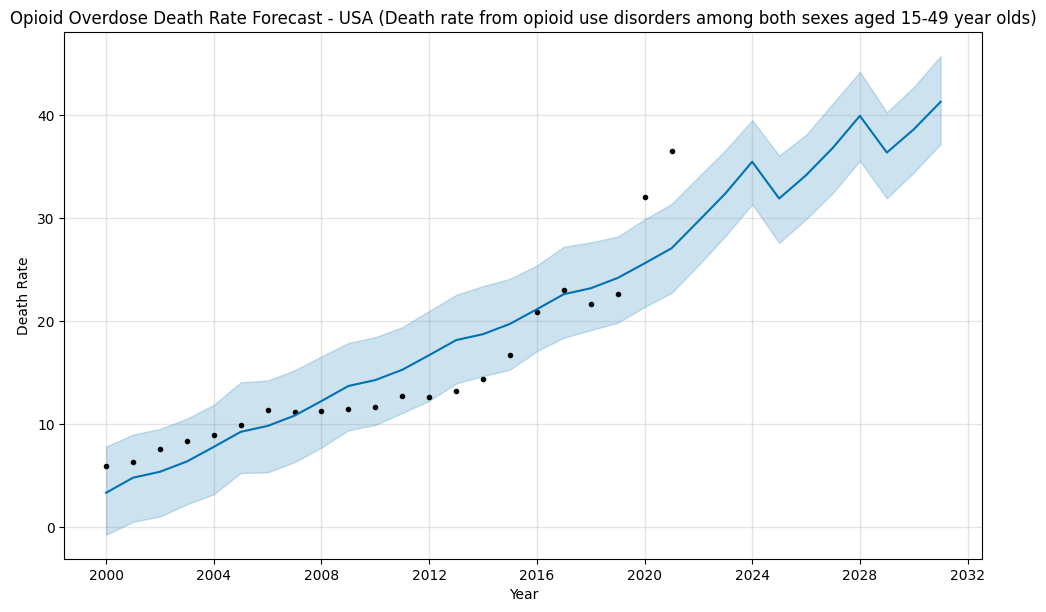

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:02 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

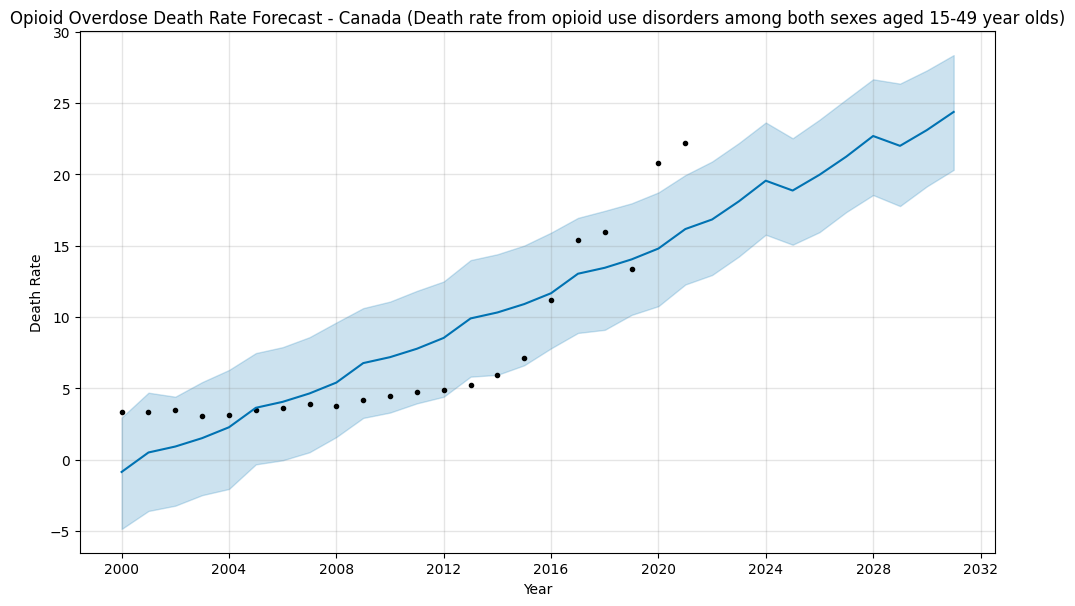

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:02 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

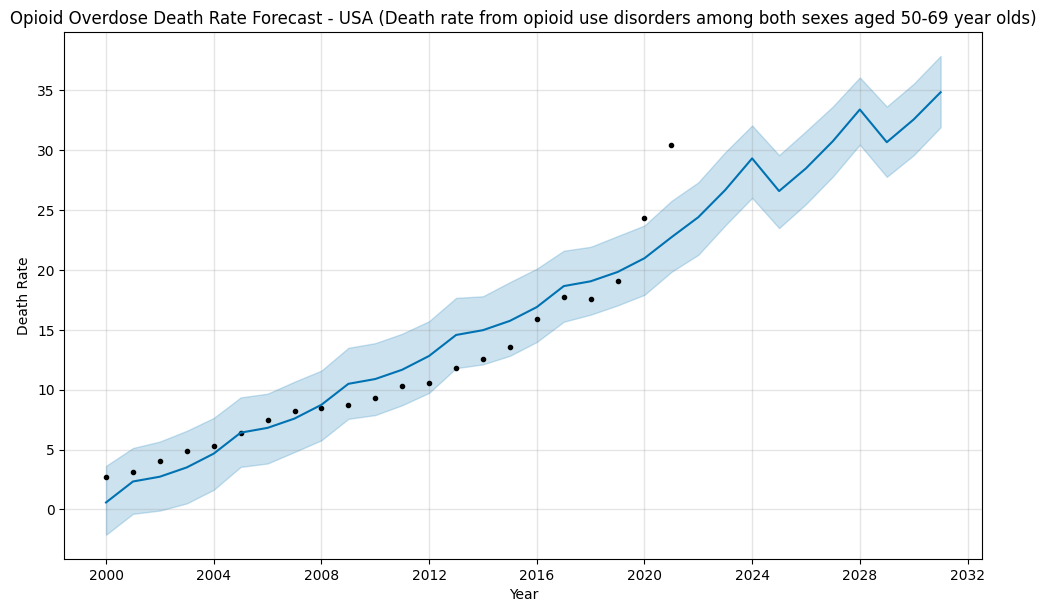

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

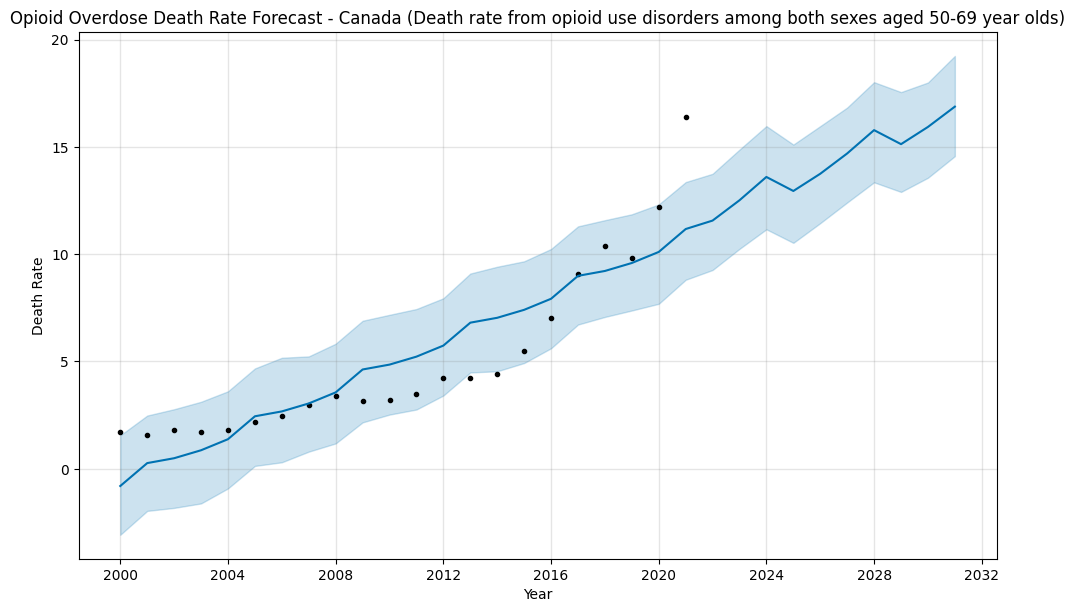

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

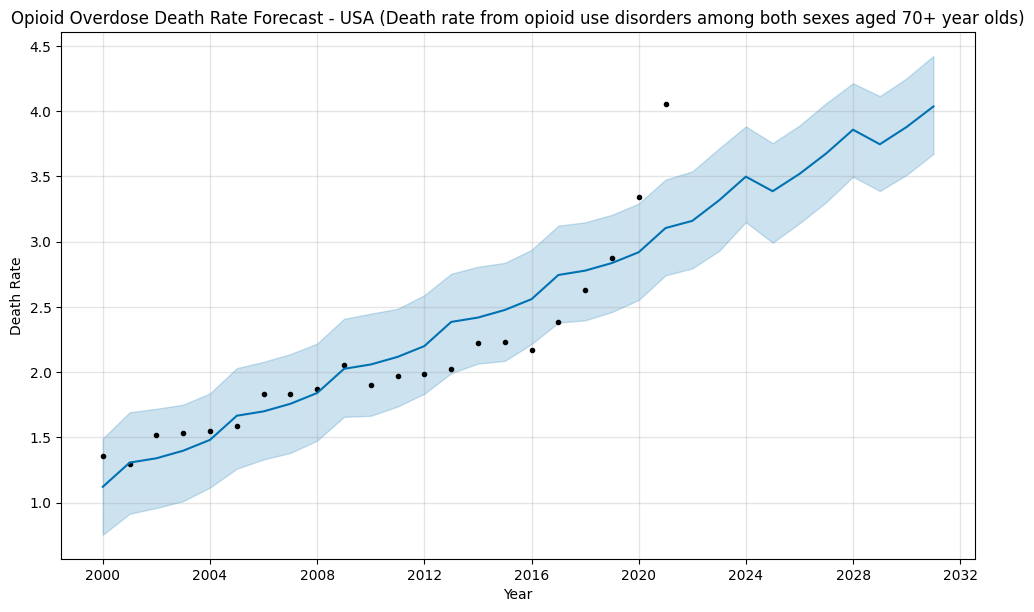

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

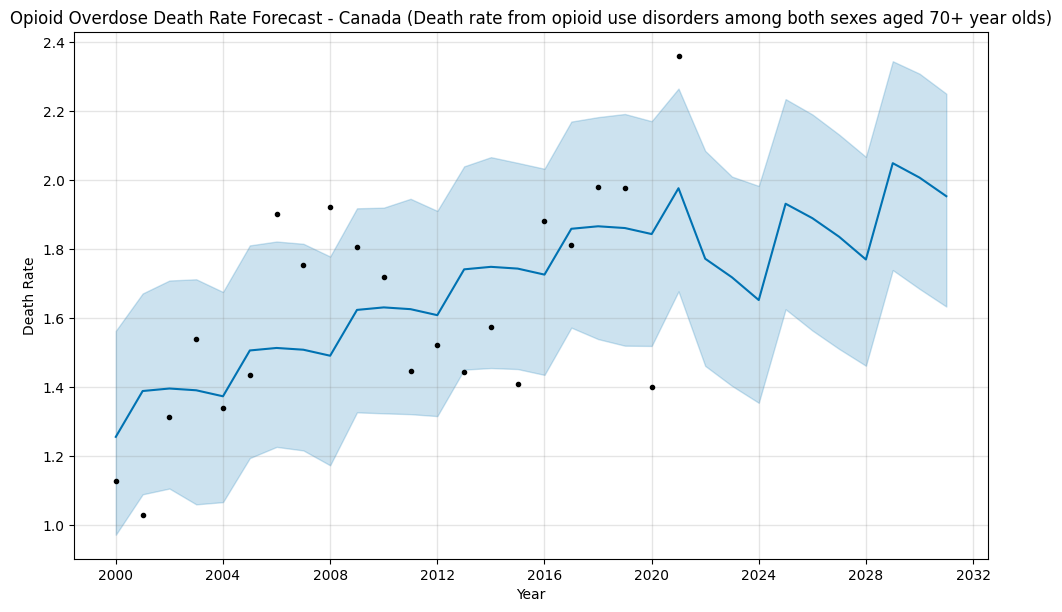

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:04 - cmdstanpy - INFO - Chain [1] start processing
17:34:04 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

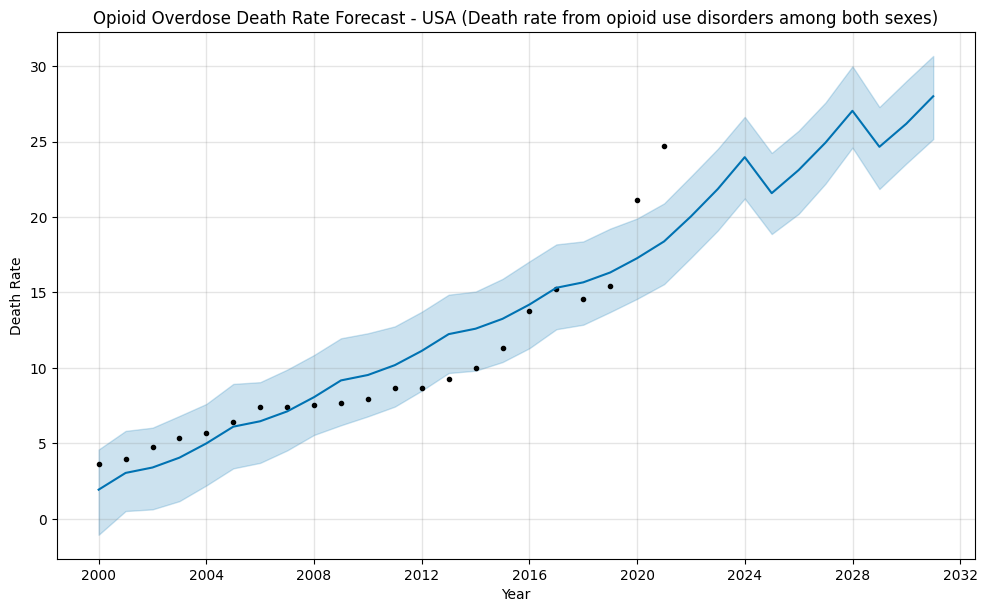

<ipython-input-14-a29c7163390a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:34:04 - cmdstanpy - INFO - Chain [1] start processing
17:34:04 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Figure size 1000x500 with 0 Axes>

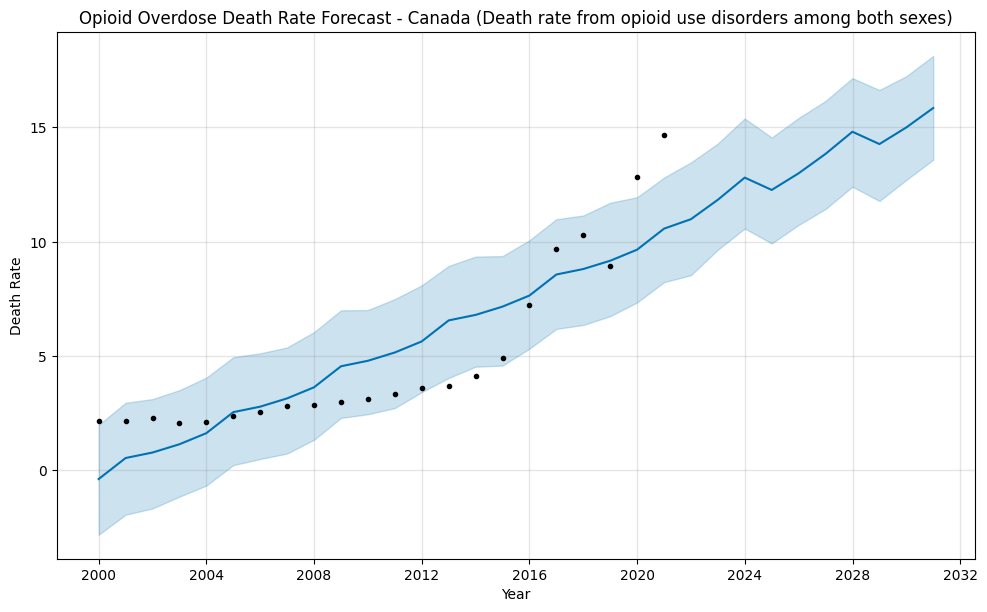

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 0-4 year olds',
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
    'Death rate from opioid use disorders among both sexes'
]

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group, country_name):
    df_filtered = df[['Year', age_group]]
    df_filtered.columns = ['ds', 'y']  # Prophet expects 'ds' for dates and 'y' for target variable
    
    # Convert 'ds' column to datetime
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_filtered)
    
    # Create future dataframe
    future = model.make_future_dataframe(periods=10, freq='Y')
    
    # Forecast the data
    forecast = model.predict(future)
    
    # Plot the forecast
    plt.figure(figsize=(10, 5))
    model.plot(forecast)
    plt.title(f"Opioid Overdose Death Rate Forecast - {country_name} ({age_group})")
    plt.xlabel("Year")
    plt.ylabel("Death Rate")
    plt.show()

# Forecast for all age groups in the USA and Canada
for age_group in age_groups:
    # Forecast for USA
    prophet_forecast(df_usa, age_group, 'USA')
    
    # Forecast for Canada
    prophet_forecast(df_canada, age_group, 'Canada')


<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



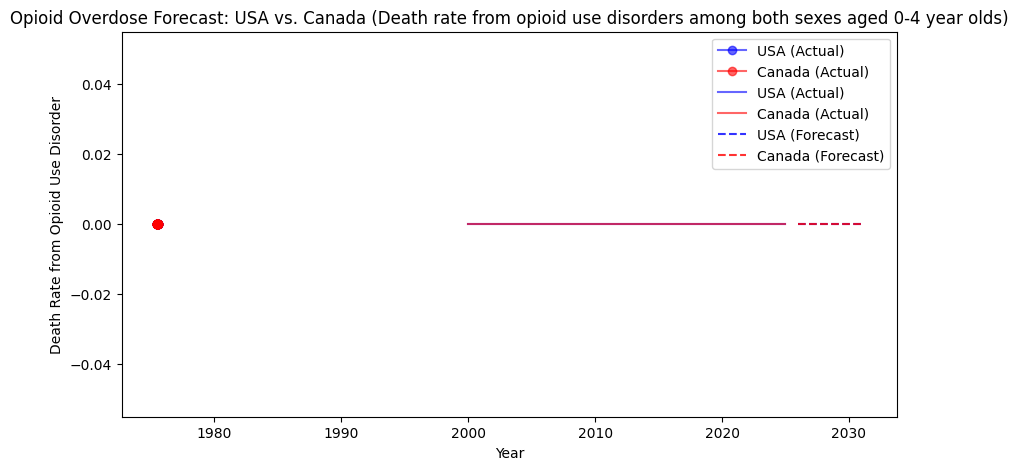

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:21 - cmdstanpy - INFO - Chain [1] start processing
17:47:22 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:22 - cmdstanpy - INFO - Chain [1] start processing
17:47:22 

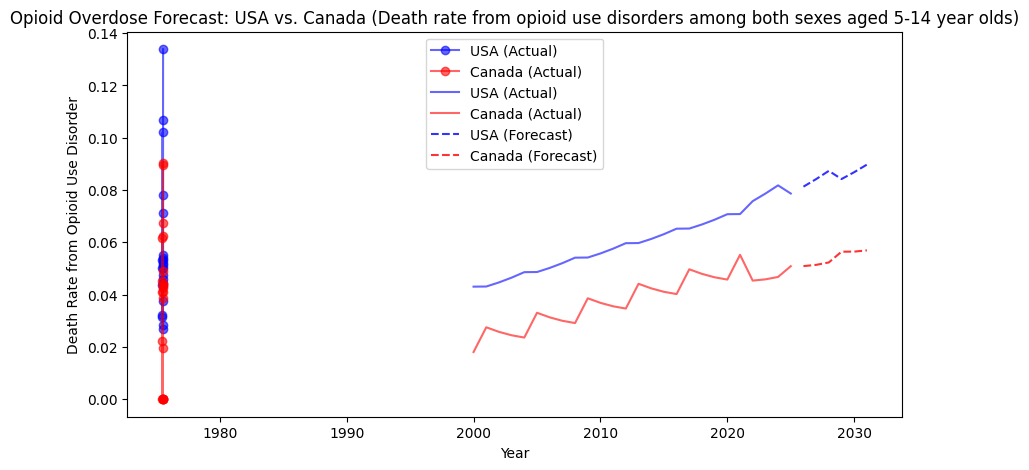

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:22 - cmdstanpy - INFO - Chain [1] start processing
17:47:22 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:22 - cmdstanpy - INFO - Chain [1] start processing
17:47:22 

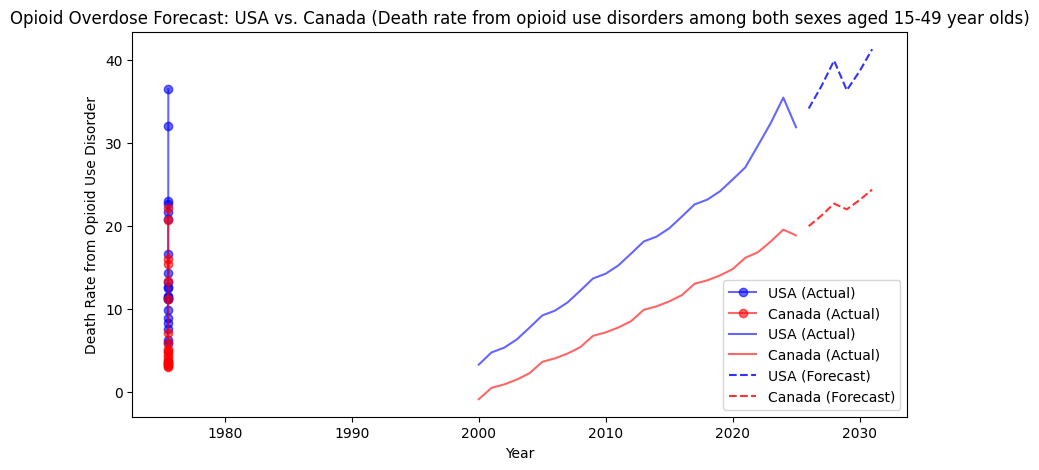

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:23 - cmdstanpy - INFO - Chain [1] start processing
17:47:23 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:23 - cmdstanpy - INFO - Chain [1] start processing
17:47:23 

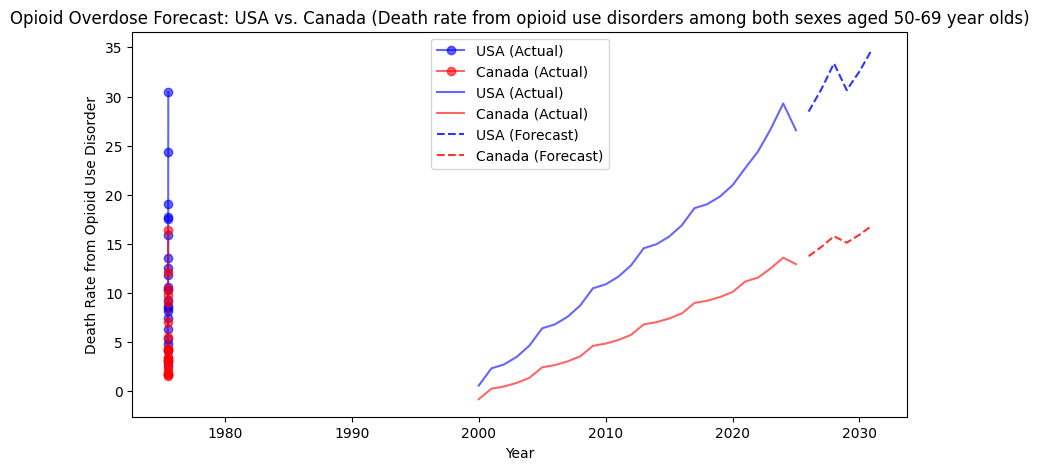

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:23 - cmdstanpy - INFO - Chain [1] start processing
17:47:23 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:24 - cmdstanpy - INFO - Chain [1] start processing
17:47:24 

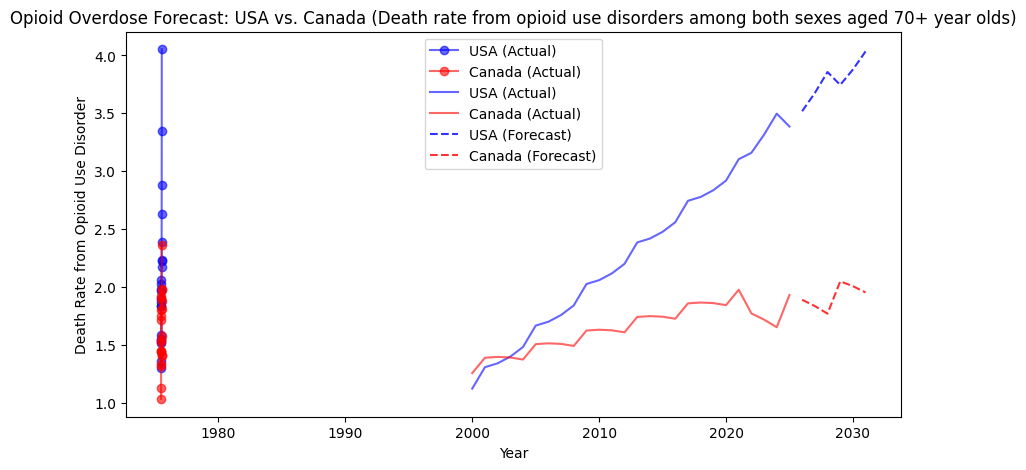

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:24 - cmdstanpy - INFO - Chain [1] start processing
17:47:24 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-24-a36a36931f90>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

17:47:24 - cmdstanpy - INFO - Chain [1] start processing
17:47:24 

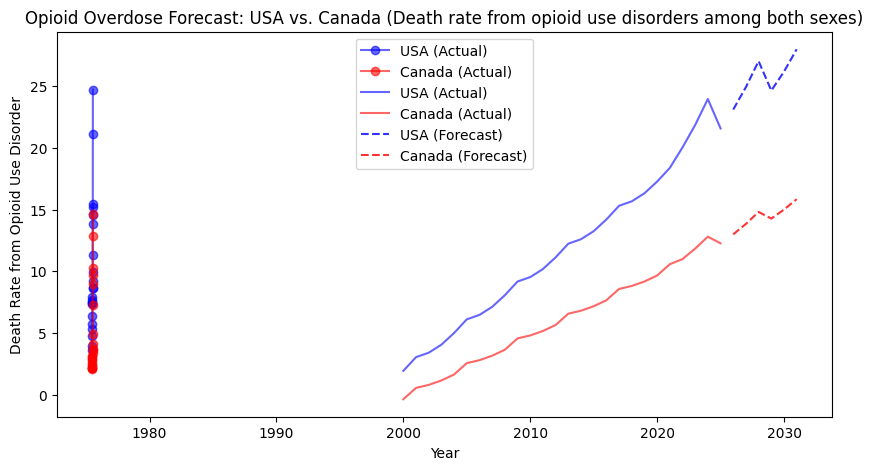

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 0-4 year olds',
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
    'Death rate from opioid use disorders among both sexes'
]

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]]
    df_filtered.columns = ['ds', 'y']  # Prophet expects 'ds' for dates and 'y' for target variable
    
    # Convert 'ds' column to datetime
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_filtered)
    
    # Create future dataframe
    future = model.make_future_dataframe(periods=10, freq='Y')
    
    # Forecast the data
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for each age group and save the plot as .jpg
for age_group in age_groups:
    # Forecast for USA and Canada
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    
    # Plot actual data (solid line for USA and Canada)
    plt.plot(df_usa['Year'], df_usa[age_group], 'bo-', label="USA (Actual)", alpha=0.6)
    plt.plot(df_canada['Year'], df_canada[age_group], 'ro-', label="Canada (Actual)", alpha=0.6)
    
    # Make actual data from 2020-2024 solid, and the rest dashed for prediction
    plt.plot(forecast_usa['ds'][forecast_usa['ds'].dt.year <= 2024], forecast_usa['yhat'][forecast_usa['ds'].dt.year <= 2024], 'b-', label="USA (Actual)", alpha=0.6)
    plt.plot(forecast_canada['ds'][forecast_canada['ds'].dt.year <= 2024], forecast_canada['yhat'][forecast_canada['ds'].dt.year <= 2024], 'r-', label="Canada (Actual)", alpha=0.6)
    
    # Plot forecasted data from 2025 onwards (dashed)
    plt.plot(forecast_usa['ds'][forecast_usa['ds'].dt.year > 2024], forecast_usa['yhat'][forecast_usa['ds'].dt.year > 2024], 'b--', label="USA (Forecast)", alpha=0.8)
    plt.plot(forecast_canada['ds'][forecast_canada['ds'].dt.year > 2024], forecast_canada['yhat'][forecast_canada['ds'].dt.year > 2024], 'r--', label="Canada (Forecast)", alpha=0.8)
    
    # Adding labels and title
    plt.xlabel("Year")
    plt.ylabel("Death Rate from Opioid Use Disorder")
    plt.title(f"Opioid Overdose Forecast: USA vs. Canada ({age_group})")
    plt.legend()
    
    # Save plot as .jpg
    plt.savefig(f"opioid_forecast_{age_group.replace('/', '_').replace(' ', '_')}.jpg", dpi=300)
    plt.show()  # Close the plot to avoid display in the loop
